In [1]:
# Basic information

import copy

HEIGHT, WIDTH = 512, 512
FPS = 30
RADIUS = 15
SPACE = 450
MILLIMETERS_IN_PIXEL = 2 * RADIUS / SPACE
FILE = 'tables/33.csv'
DELTA = 5

In [2]:
# Processing

import pandas as pd
data = pd.read_csv(FILE)
data.head(10)
data.drop('scorer', axis=1, inplace=True)
data.drop([0, 1], inplace=True)
data.reset_index(inplace=True, drop=True)

columns_total = copy.deepcopy(len(data.columns))
for i in range(0, columns_total, 3):
    data.drop(data.columns[columns_total - i - 1], axis = 1, inplace = True)
    i -= 1

new_columns = []
for i in range(0, len(data.columns) // 2):
    new_columns.append(str(i + 1) + 'x')
    new_columns.append(str(i + 1) + 'y')

data.set_axis(new_columns, axis='columns', inplace = True)
data = data.apply(pd.to_numeric)
data *= MILLIMETERS_IN_PIXEL

data.head(10).round(4)

FileNotFoundError: [Errno 2] File b'tables/33.csv' does not exist: b'tables/33.csv'

In [437]:
def normalize(data, number):
    for i in range(1, len(data.values)):
        dx = data.values[i][number * 2] - data.values[i - 1][number * 2]
        dy = data.values[i][number * 2 + 1] - data.values[i - 1][number * 2 + 1]
        if dx * dx + dy * dy > DELTA:
            data.values[i][number * 2] = data.values[i - 1][number * 2]
            data.values[i][number * 2 + 1] = data.values[i - 1][number * 2 + 1]

In [438]:
for number in range(0, len(data.columns) // 2):
    normalize(data, number)

In [439]:
# Ploting trajectories

import matplotlib.pyplot as plt

def plot_trajectories(data, numbers):
    cycol = cycle('bgrcmk')
    ax = data.plot(x = str(numbers[0] + 1) + 'x', y = str(numbers[0] + 1) + 'y', style='b', legend = False, figsize = [10, 10 * HEIGHT / WIDTH])
    for i in range(1, len(numbers)):
        data.plot(x = str(numbers[i] + 1) + 'x', y = str(numbers[i] + 1) + 'y', ax = ax, legend = False)
    ax.set_xlabel('x, mm')
    ax.set_ylabel('y, mm')
    ax.set_axisbelow(True)
    ax.minorticks_on()
    ax.grid(which = 'major', linestyle = ':')
    ax.grid(which = 'minor', linestyle=':', linewidth='0.5')
    ax.set_ylim(0, HEIGHT * MILLIMETERS_IN_PIXEL)
    ax.set_xlim(0, WIDTH * MILLIMETERS_IN_PIXEL)
    plt.title('Trajectories for ' + str(RADIUS * 2) + 'cm circle')
    plt.show()

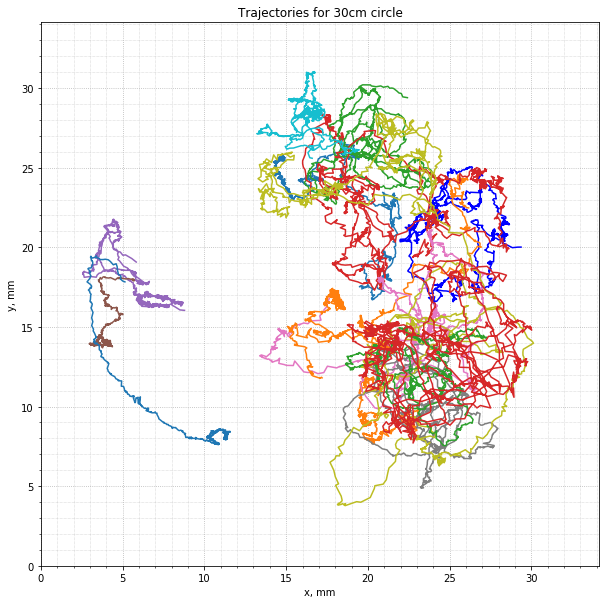

In [440]:
plot_trajectories(data, [i for i in range(0, len(data.columns) // 2)])

In [441]:
# Path ploting

import matplotlib.pyplot as plt
from itertools import cycle
import numpy as np

def path(data, numbers):
    result = []
    ax = plt.figure(figsize = (16, 8)).gca()
    time_value = [t / FPS for t in range(0, len(data))]
    
    for element in numbers:
        current = [0]
        for i in range(1, len(data.values)):
            dxcur = data.values[i][element * 2] - data.values[i - 1][element * 2]
            dycur = data.values[i][element * 2 + 1] - data.values[i - 1][element * 2 + 1]
            value = current[-1] + np.sqrt(dxcur * dxcur + dycur * dycur)
            current.append(value)
        plt.plot(time_value, current, ':', c = 'steelblue')
        result.append(current)
        
    average_path = []
    for i in range(0, len(data.values)):
        total = 0
        for element in result:
            total += element[i]
        total /= len(result)
        average_path.append(total)
    plt.plot(time_value, average_path, c = 'red')
    plt.plot(time_value, [RADIUS * 10] * len(time_value), c = 'black')
    ax.set_xlabel('t, s')
    ax.set_ylabel('length, mm')
    ax.set_axisbelow(True)
    ax.minorticks_on()
    ax.grid(which = 'major', linestyle = ':')
    ax.grid(which = 'minor', linestyle = ':', linewidth = '0.5')
    plt.title('Path length for ' + str(RADIUS * 2) + 'cm circle')

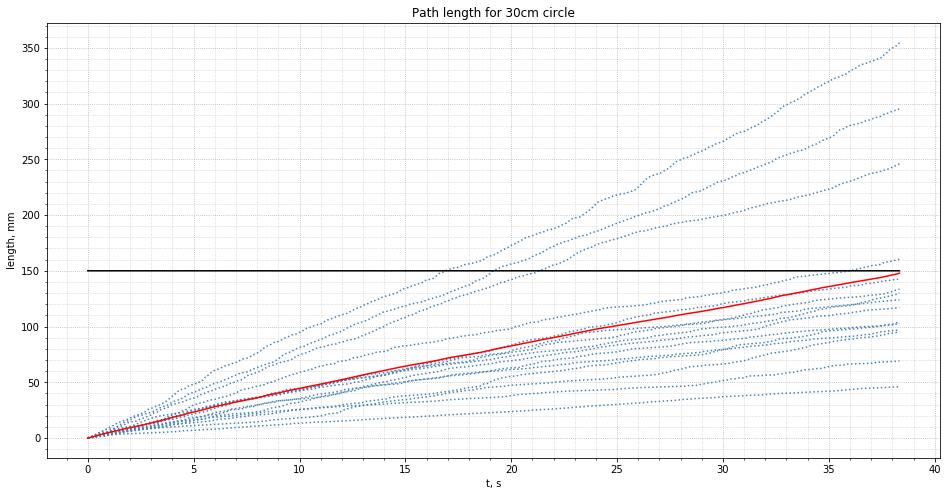

In [442]:
path(data, [i for i in range(0, len(data.columns) // 2)])

In [443]:
# Distance ploting

import matplotlib.pyplot as plt
from itertools import cycle
import numpy as np

def plot_distance(data, numbers):
    result = []
    ax = plt.figure(figsize = (16, 8)).gca()
    time_value = [t / FPS for t in range(0, len(data))]
    
    for element in numbers:
        dist = []
        for i in range(0, len(data.values)):
            dxcur = data.values[i][element * 2] - data.values[0][element * 2]
            dycur = data.values[i][element * 2 + 1] - data.values[0][element * 2 + 1]
            dist.append(np.sqrt(dxcur * dxcur + dycur * dycur))
        time_value = [t / FPS for t in range(0, len(data))]
        plt.plot(time_value, dist, ':', c = 'steelblue')
        result.append(dist)
        
    average_dist = []
    for i in range(0, len(data.values)):
        total = 0
        for element in result:
            total += element[i]
        total /= len(result)
        average_dist.append(total)
    plt.plot(time_value, average_dist, c = 'red')
    plt.plot(time_value, [RADIUS] * len(time_value), c = 'black')
    
    ax.set_xlabel('t, s')
    ax.set_ylabel('distance, сm')
    ax.set_axisbelow(True)
    ax.minorticks_on()
    ax.grid(which = 'major', linestyle = ':')
    ax.grid(which = 'minor', linestyle = ':', linewidth='0.5')
    plt.title('Distance for ' + str(RADIUS * 2) + 'cm circle')

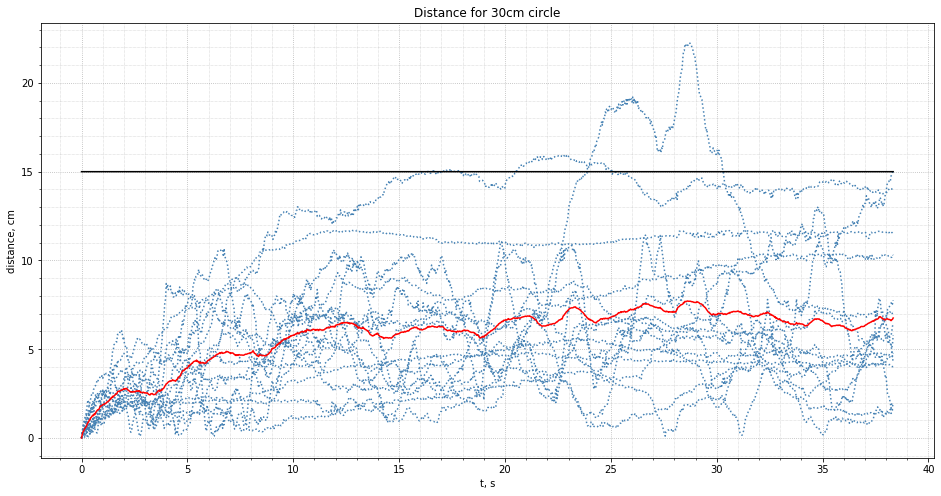

In [444]:
plot_distance(data, [i for i in range(0, len(data.columns) // 2)])

In [445]:
# Distance from center ploting

import matplotlib.pyplot as plt
from itertools import cycle
import numpy as np

def center_distance(data, numbers):
    result = []
    ax = plt.figure(figsize = (16, 8)).gca()
    time_value = [t / FPS for t in range(0, len(data))]
    
    for element in numbers:
        dist = []
        for i in range(0, len(data.values)):
            dxcur = data.values[i][element * 2] - MILLIMETERS_IN_PIXEL * WIDTH / 2
            dycur = data.values[i][element * 2 + 1] - MILLIMETERS_IN_PIXEL * HEIGHT / 2
            dist.append(np.sqrt(dxcur * dxcur + dycur * dycur))
        time_value = [t / FPS for t in range(0, len(data))]
        plt.plot(time_value, dist, ':', c = 'steelblue')
        result.append(dist)
        
    average_dist = []
    for i in range(0, len(data.values)):
        total = 0
        for element in result:
            total += element[i]
        total /= len(result)
        average_dist.append(total)
    plt.plot(time_value, average_dist, c = 'red')
    plt.plot(time_value, [RADIUS] * len(time_value), c = 'black')
    
    ax.set_xlabel('t, s')
    ax.set_ylabel('distance, сm')
    ax.set_axisbelow(True)
    ax.minorticks_on()
    ax.grid(which = 'major', linestyle = ':')
    ax.grid(which = 'minor', linestyle = ':', linewidth='0.5')
    plt.title('Distance from center for ' + str(RADIUS * 2) + 'cm circle')

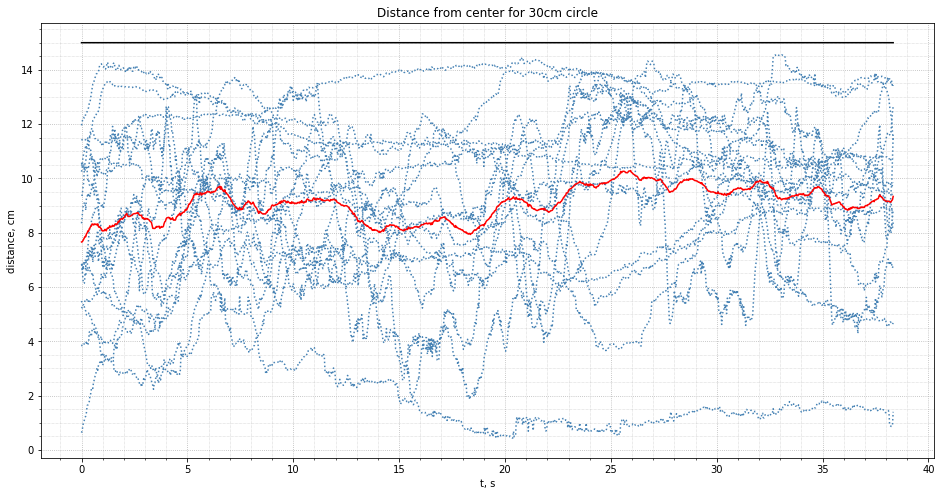

In [446]:
center_distance(data, [i for i in range(0, len(data.columns) // 2)])